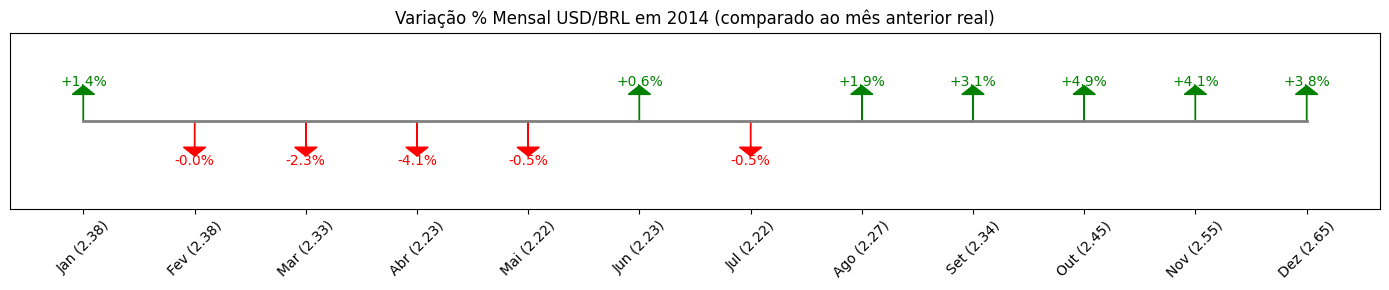

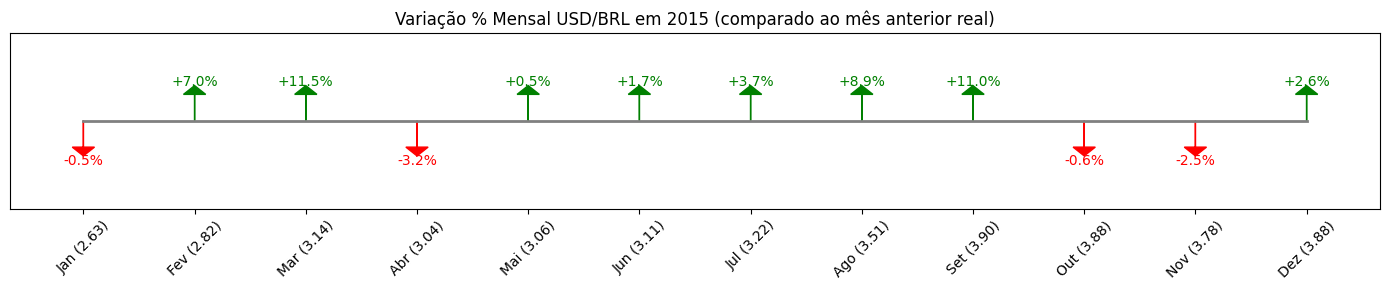

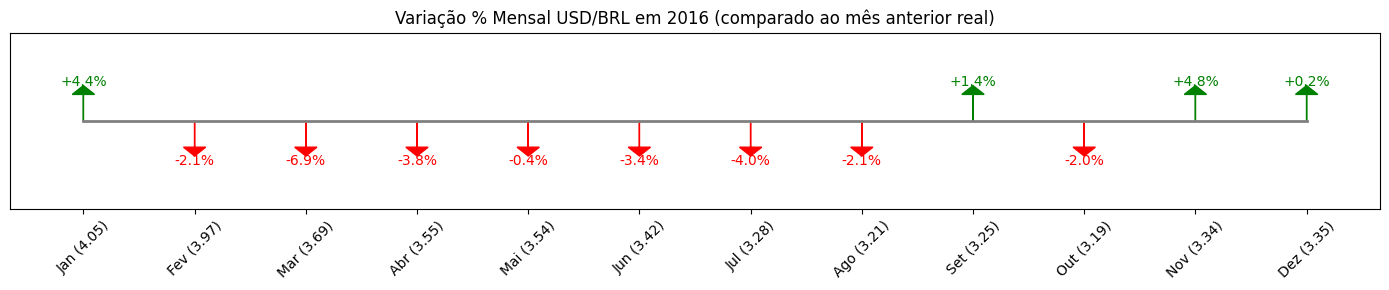

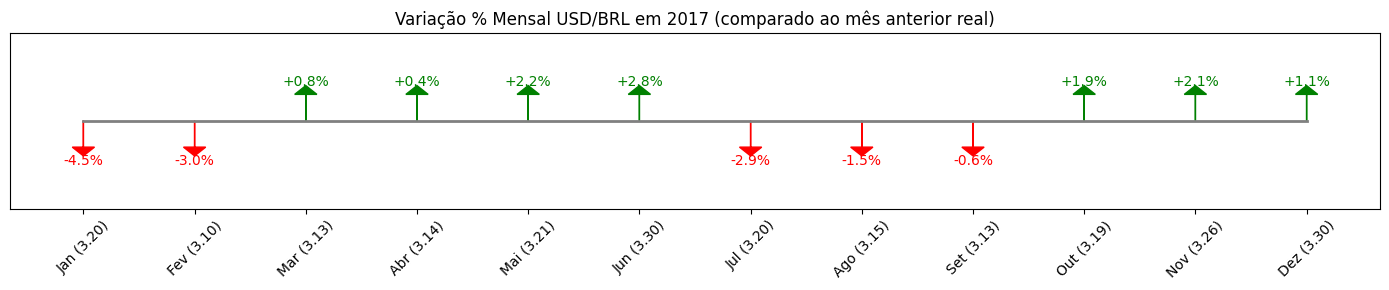

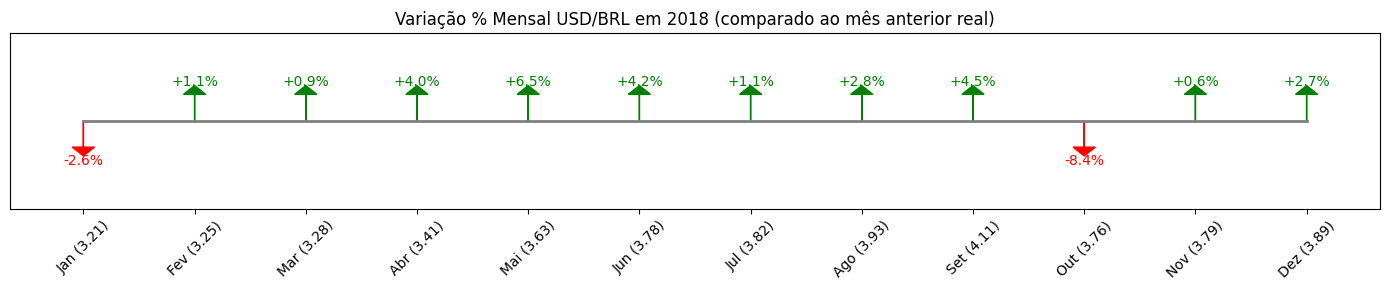

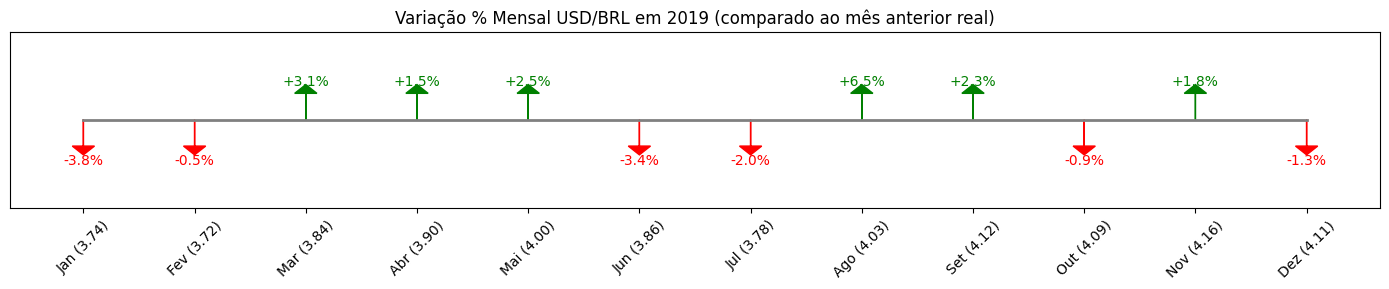

KeyError: "None of [Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Data')] are in the [index]"

In [ ]:
# visualização de informação temporal em linha do tempo
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('USD_BRL_hist.csv')
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)

anos = list(range(2014, 2025))  # 2014 a 2024 inclusive
meses_labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

for ano in anos:
    # Pega média mensal do ano anterior (inclui dezembro do ano anterior)
    df_ano_ant = df[df['Data'].dt.year == ano - 1]
    media_mes_ano_ant = df_ano_ant.groupby(df_ano_ant['Data'].dt.month)['USD_BRL'].mean()

    # Pega média mensal do ano atual
    df_ano = df[df['Data'].dt.year == ano]
    media_mes_ano = df_ano.groupby(df_ano['Data'].dt.month)['USD_BRL'].mean()

    # Junta dezembro do ano anterior + todos os meses do ano atual (jan a dez)
    media_concatenada = pd.concat([
        media_mes_ano_ant.loc[[12]],
        media_mes_ano.loc[range(1,13)]
    ])

    # Calcula variação mês a mês (cada mês em relação ao anterior)
    variacao_pct = media_concatenada.pct_change().dropna() * 100  # descarta dezembro anterior, começa em janeiro

    # Formata labels com mês + valor médio arredondado
    labels_com_valor = []
    for mes in range(1,13):
        val = media_mes_ano.get(mes, float('nan'))
        labels_com_valor.append(f"{meses_labels[mes-1]} ({val:.2f})")

    x = range(len(variacao_pct))
    y = [0]*len(variacao_pct)

    fig, ax = plt.subplots(figsize=(14, 3))
    ax.plot(x, y, color='gray', linewidth=2)

    for i, val in enumerate(variacao_pct):
        if val > 0:
            ax.arrow(x[i], 0, 0, 0.3, head_width=0.2, head_length=0.1, fc='green', ec='green')
            ax.text(x[i], 0.4, f'+{val:.1f}%', ha='center', color='green')
        else:
            ax.arrow(x[i], 0, 0, -0.3, head_width=0.2, head_length=0.1, fc='red', ec='red')
            ax.text(x[i], -0.5, f'{val:.1f}%', ha='center', color='red')

    ax.set_xticks(x)
    ax.set_xticklabels(labels_com_valor, rotation=45)
    ax.set_yticks([])
    ax.set_ylim(-1,1)
    ax.set_title(f'Variação % Mensal USD/BRL em {ano} (comparado ao mês anterior real)')
    plt.tight_layout()
    plt.show()
